# Урок 4. Визуальный анализ данных

In [1]:
import pandas as pd
import numpy as np
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns


## Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

### 1.1. Скачать данные

In [2]:
df = pd.read_csv('kc-house-data.csv', encoding = 'cp1251', index_col = 'id')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

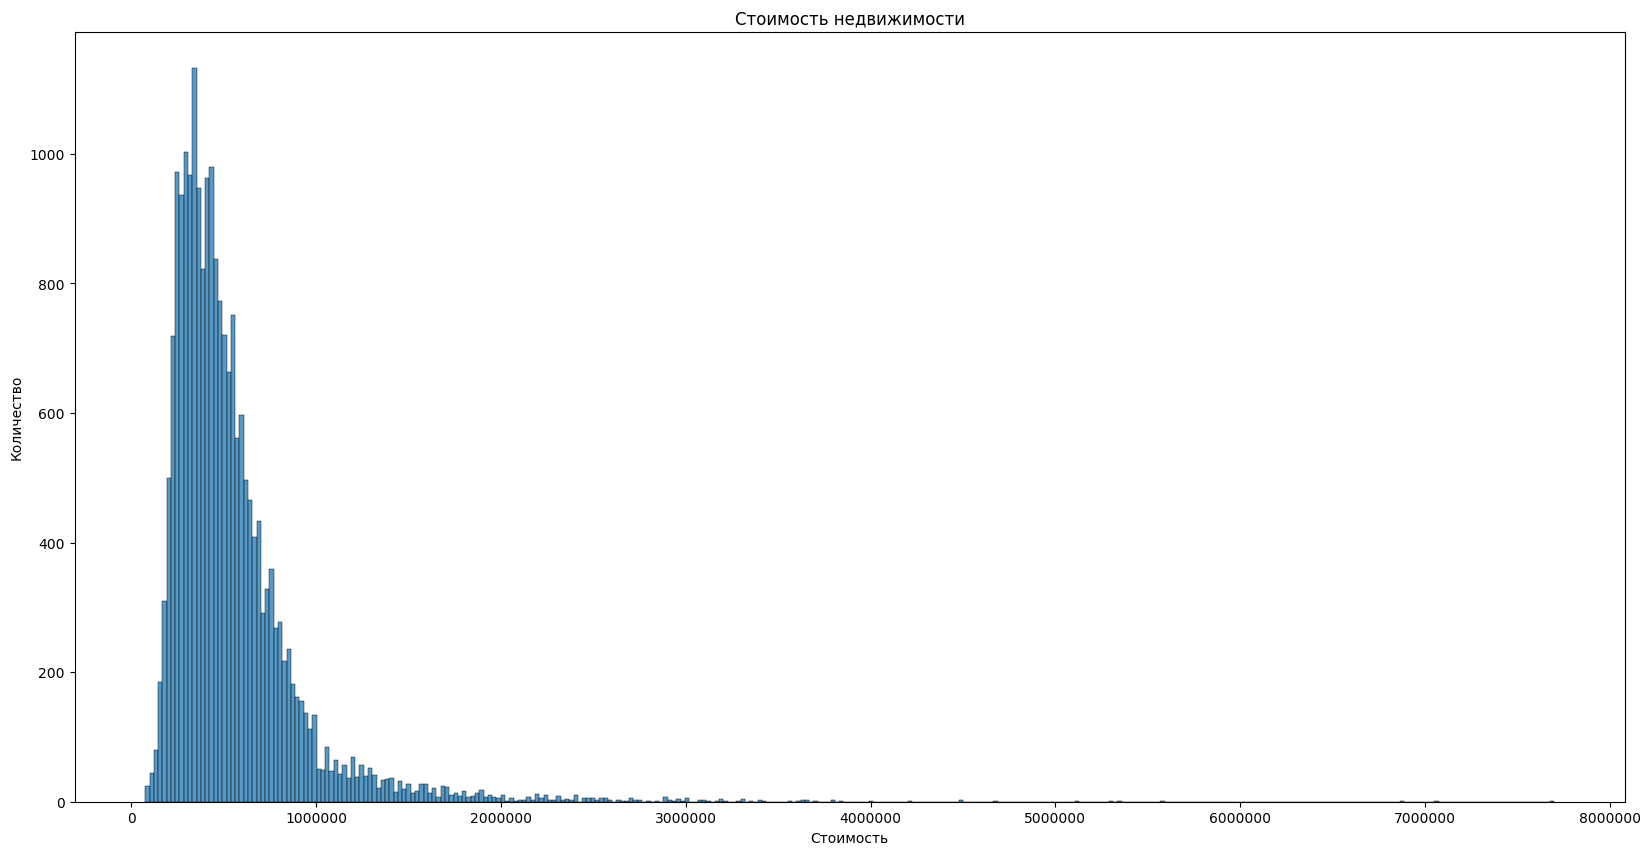

In [3]:
plt.figure(figsize = (20, 10))
sns.histplot(df['price'])
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.title('Стоимость недвижимости')
plt.ticklabel_format(style='plain')

Большая часть недвижимости имеет стоимость до 1 млн. рублей

### 1.3 Изучите распределение квадратуры жилой

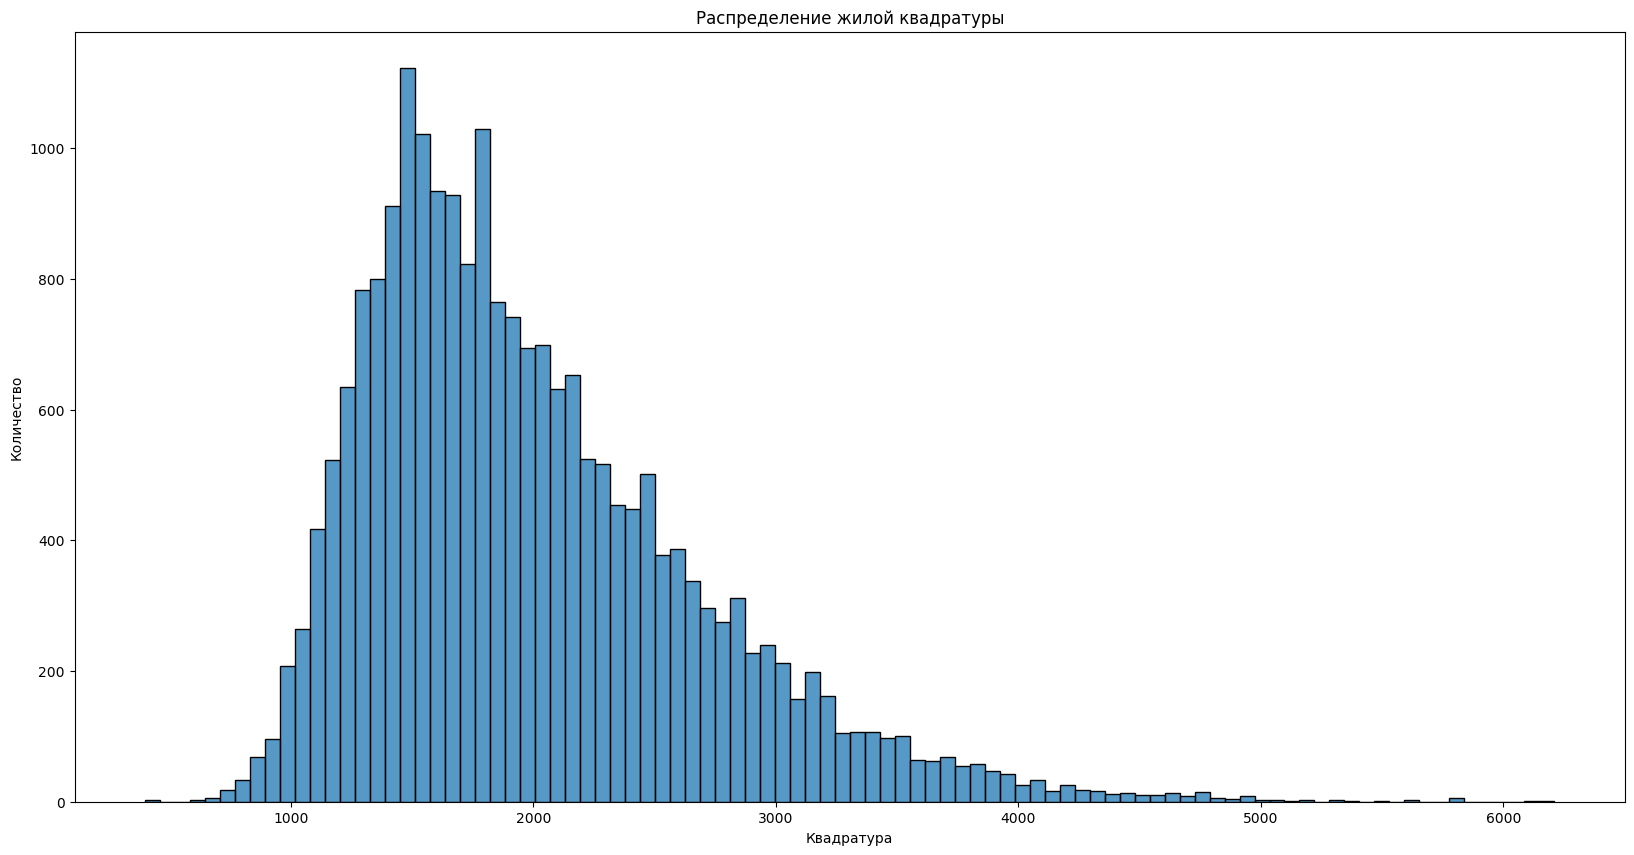

In [4]:
plt.figure(figsize = (20, 10))
sns.histplot(df['sqft_living15'])
plt.xlabel('Квадратура')
plt.ylabel('Количество')
plt.title('Распределение жилой квадратуры')
plt.ticklabel_format(style='plain')

Большая часть недвижимости имеет жилую площадь от 1000 до 2000

### 1.4 Изучите распределение года постройки

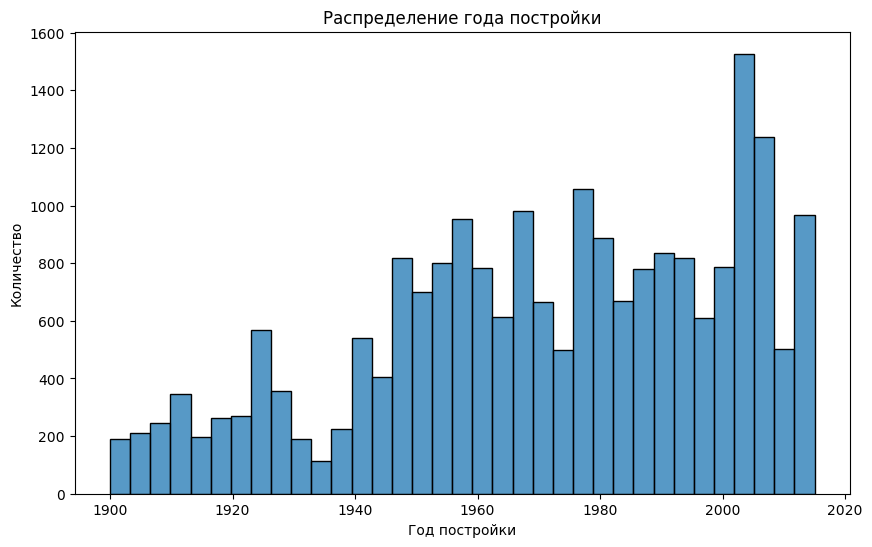

In [5]:
plt.figure(figsize = (10, 6))
sns.histplot(df['yr_built'])
plt.xlabel('Год постройки')
plt.ylabel('Количество')
plt.title('Распределение года постройки')
plt.ticklabel_format(style='plain')

Больше всего недвижимости построено в начале 2000-х годов

## 2 задача
### 2.1 Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

In [6]:
data = df['waterfront'].value_counts()
data

0    21450
1      163
Name: waterfront, dtype: int64

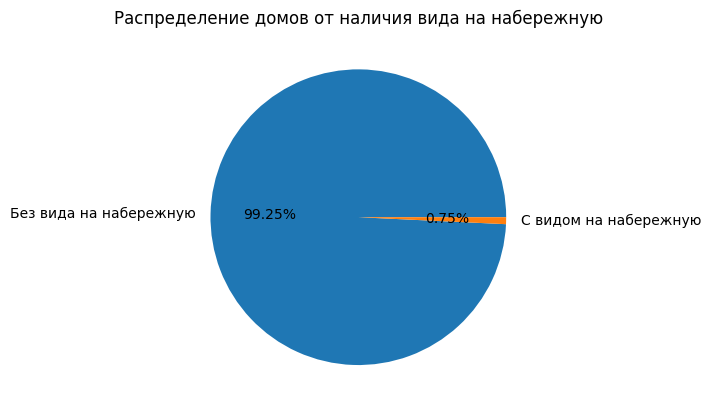

In [7]:
plt.pie(data.values, labels = ['Без вида на набережную', 'С видом на набережную'], autopct = '%.2f%%')
plt.title('Распределение домов от наличия вида на набережную');

### 2.2 Изучите распределение этажей домов

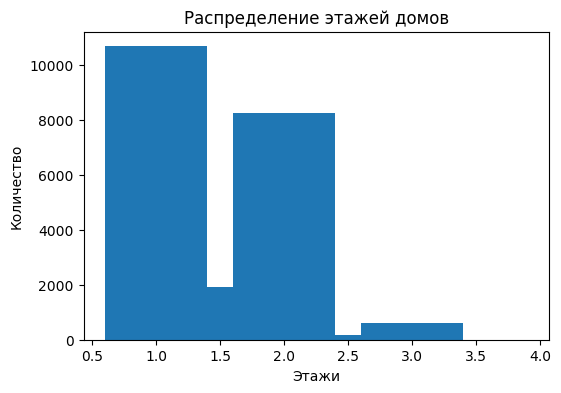

In [8]:
data = df['floors'].value_counts()
plt.figure(figsize = (6, 4))
plt.bar(data.index, data.values)
plt.xlabel('Этажи')
plt.ylabel('Количество')
plt.title('Распределение этажей домов');

Больше всего одноэтажных домов

### 2.2 Изучите распределение состояния домов

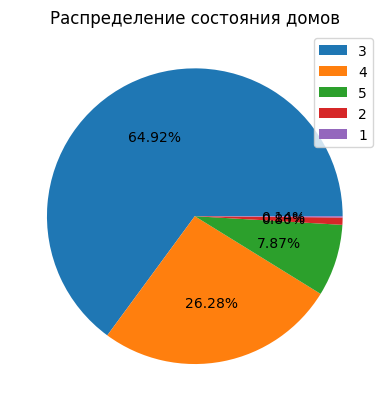

In [9]:
data = df['condition'].value_counts()
plt.pie(data.values, autopct = '%.2f%%')
plt.legend(data.index)
plt.title('Распределение состояния домов');

Большая часть домов находятся в не очень хорошем состоянии

## 3 задача

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

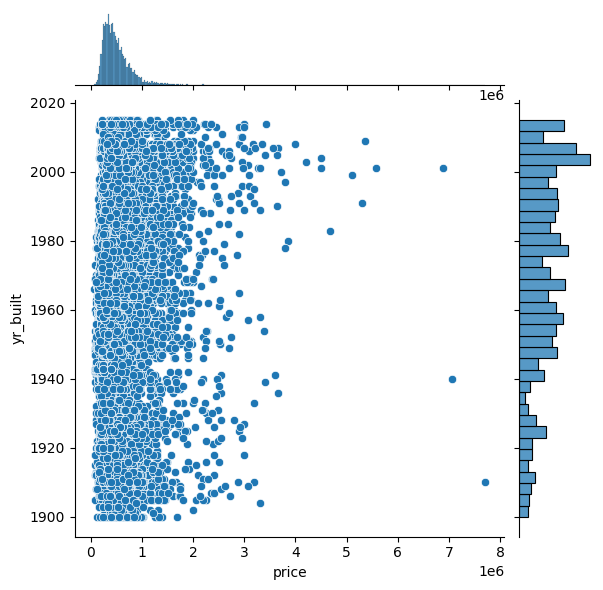

In [10]:
sns.jointplot(x=df['price'], y=df['yr_built']);

Год постройки не оказывает существенного влияния на цену

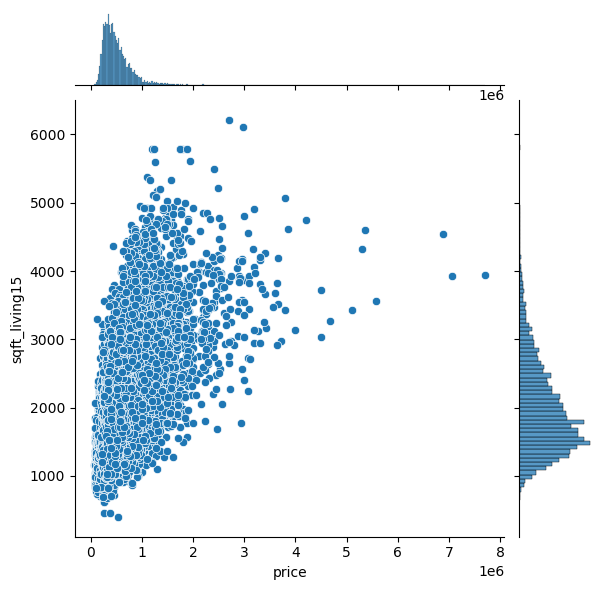

In [11]:
sns.jointplot(x=df['price'], y=df['sqft_living15']);

Есть прямая зависимость цены недвижимости от жилой площади

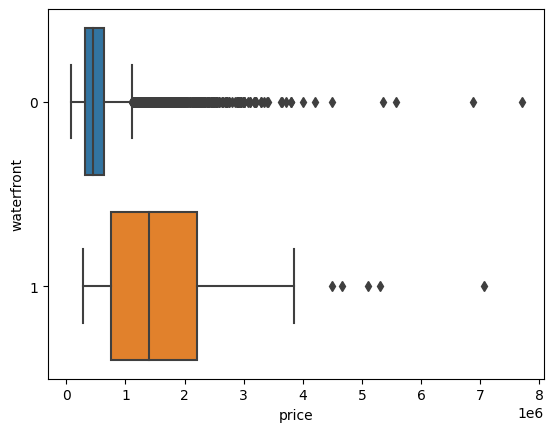

In [12]:
sns.boxplot(x=df['price'], y=df['waterfront'].astype('str'), whis=1.5);

Цена жилья с видом на набережную значительно выше, чем без него

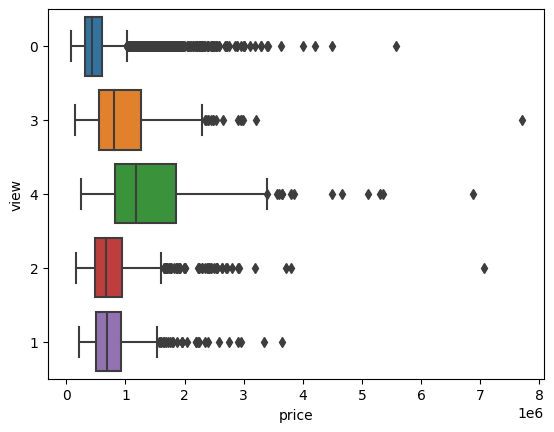

In [13]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5);

Недвижимость, с оценкой вида "4", продаётся дороже. Оценка вида оказывает значительное влияние на цену

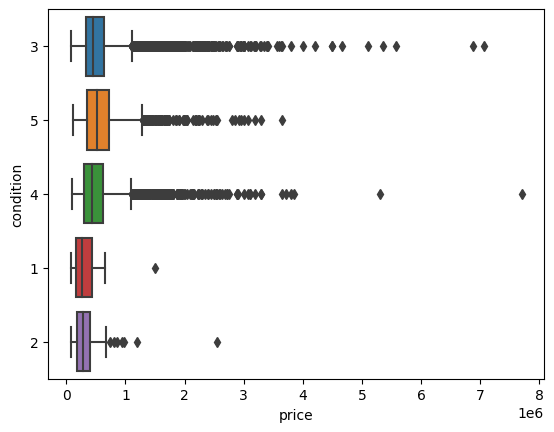

In [14]:
sns.boxplot(x=df['price'], y=df['condition'].astype('str'), whis=1.5);

Дома с оценками состояния "3", "4", "5" находятся примерно в одном ценовом диапазоне